In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Set Variables and Load Data

In [5]:
train_feature_df= pd.read_csv('codeprojects/train_features.csv')
train_target_df=pd.read_csv('codeprojects/train_salaries.csv')
test_feature_df=pd.read_csv('codeprojects/test_features.csv')
target='salary'

Inspect datasets

In [13]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [14]:
train_target_df.head(15)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [15]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [17]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


Data types match their column descriptions. No need to change data types

Check for duplicates

In [18]:
train_feature_df.duplicated().sum()

0

In [19]:
train_target_df.duplicated().sum()

0

Duplicated entries are not found. No need to remove any.

Check for NA or missing values

In [4]:
def check_missing(df):
    missing_val= pd.isnull(df).sum()
    print(missing_val)
check_missing(train_feature_df)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [60]:
check_missing(train_target_df)

jobId     0
salary    0
dtype: int64


In [61]:
check_missing(test_feature_df)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


Missing or NA values not found in any columns in all 3 datasets.

Identify and Summarize categorical and numerical features separately

In [7]:
num_var= ["yearsExperience","milesFromMetropolis"]
cat_var= ["jobId", "companyId","jobType", "degree", "major", "industry", "yearsExperience"]
train_feature_df.describe(include=['int64'])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [24]:
train_feature_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684842748,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


Merge feature and target dataframes into 1 training set

In [6]:
complete_train_df= pd.merge(train_feature_df, train_target_df, on= 'jobId', how= 'inner')


Visualize target variable - salary

C:\Users\tiffa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


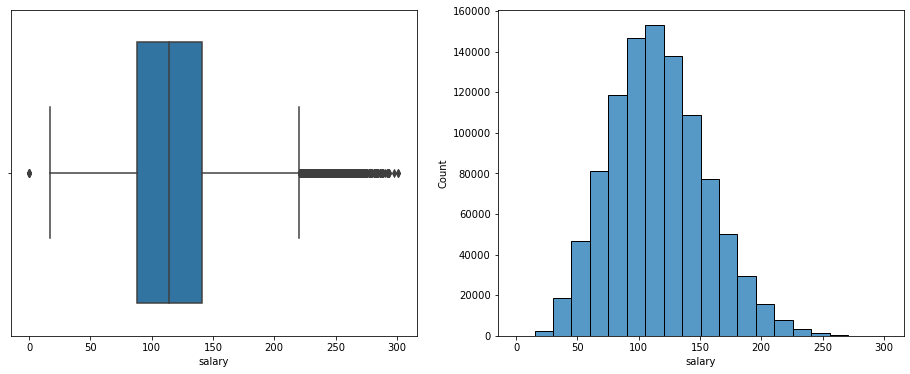

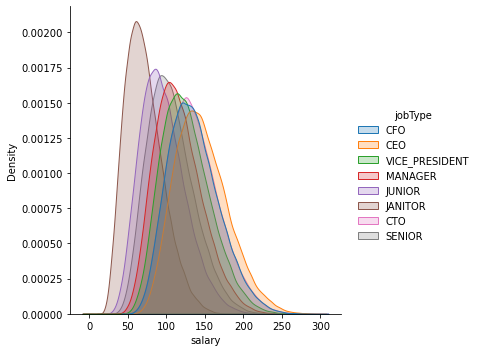

In [19]:
def visualize_target(df, target):
#     cat_variables=['']
#     fig, axs = plt.subplots(3)
    plt.figure(figsize= (16,6))
    plt.subplot(1,2,1)
    sns.boxplot(df[target])
    plt.subplot(1,2,2)
    sns.histplot(df[target], bins=20)
    
#     plt.figure(figsize= (16,16))
#     plt.subplot(2, 1,1)
    sns.displot(data=df, x= target, hue='jobType', kind='kde', fill=True, legend=True)
    plt.show()
visualize_target(complete_train_df, target)
#note differences between displot and distplot

Both graphs in top row complement the reader's understanding of the statistical measures as well as the distribution of its datapoints.
Bottom graph shows that given the more or less normal distribution, the peak of the CEO curve protruding to the right shows that the average salary is higher than the other job types, but its lower peak shows its scarcity.  
Moving along, the box plot reveals a potential outlier which we will formally investigate next.

Identify Outliers Using IQR calculation

In [41]:
def find_outliers(df,target):
    #stats=complete_train_df.describe()
    #DO NOT use describe as it gives you the measures by numerical variables (not categorical)
    #stats2=stats.set_index("yearsExperience",inplace=True)
    stats=df[target].describe()
    print(stats)
    UQ= stats['75%']
    LQ= stats['25%']
    IQR= UQ - LQ
    print(IQR)
    print('Since the IQR is %0.2f...'%(IQR))
    upper= UQ+1.5*IQR
    lower= LQ-1.5*IQR
    print("The upper and lower bounds for outlier detection are %0.2f and %0.2f" %(upper,lower))

find_outliers(complete_train_df,target)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
53.0
Since the IQR is 53.00...
The upper and lower bounds for outlier detection are 220.50 and 8.50


Analyze outliers and conclude elimination of outliers

In [5]:
complete_train_df[complete_train_df.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [52]:
complete_train_df.loc[complete_train_df.salary>220.50, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

Salaries should not be $0. So those below the lower bound will be properly removed. As for upper bound values, the salaries intuitively match their job type descriptions (though more information may be required). I determine these values to be appropriate and therefore left intact.

In [23]:
complete_train_df=complete_train_df[complete_train_df.salary>8.5]
complete_train_df.head()
complete_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [26]:
def plot_feature(df, feature,target):
    unique_features= ['companyId']
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    if df[feature].dtype=='int64':
    #we want 'companyId' to be treated as categorical in this case, for smooth and consistent line
        df[feature].value_counts().sort_index().plot()
        
    else:
        df[feature].value_counts().plot()
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel('Counts')
    
    #for 2nd plot, we represent categorical values by their mean salaries
    #arranged in order by first converting to scalar type and then plot
    plt.subplot(1,2,2)
    if df[feature].dtype=='int64' or feature in unique_features:
        mean= df.groupby(feature).agg({target: 'mean'})
        std=df.groupby(feature)[target].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
        alpha = 0.2)
       
    else:
        #find means for respective categories, arranged in ascending order
        df[feature]= df[feature].astype('category')
        group_mean=df.groupby(feature)[target].mean()
        ordered_list=group_mean.sort_values().index.values.tolist() 
        #index creates the basic object which stores the axis labels for all pandas objects, 
        #this must be converted to scalar type, which 'tolist' offers    
        df[feature].cat.reorder_categories(ordered_list, inplace=True)
        sns.boxplot(data=df,x=feature, y=target)
        
    plt.xticks(rotation=45)
    plt.ylabel('salary')
    plt.show()
# plot_feature(complete_train_df, 'jobType', target)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


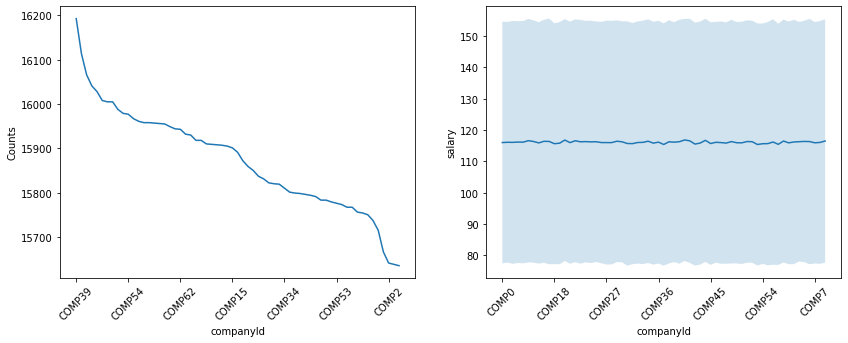

jobType
JANITOR            70.813045
JUNIOR             95.331557
SENIOR            105.487775
MANAGER           115.367596
VICE_PRESIDENT    125.367629
CFO               135.458547
CTO               135.479983
CEO               145.311425
Name: salary, dtype: float64


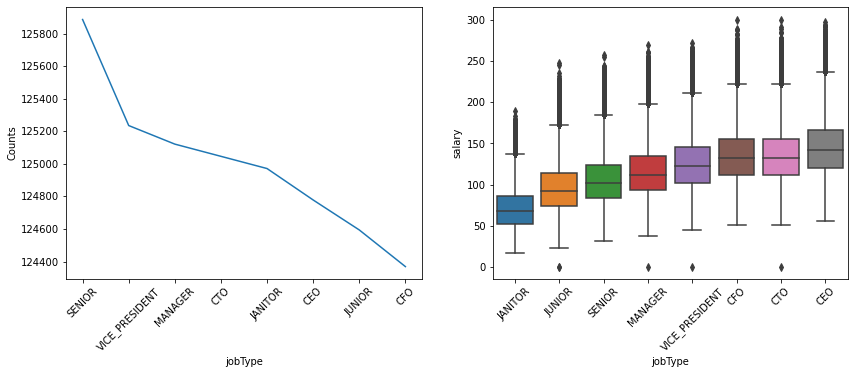

degree
BACHELORS      125.454663
DOCTORAL       135.489433
HIGH_SCHOOL    101.920654
MASTERS        130.504903
NONE            98.176467
Name: salary, dtype: float64


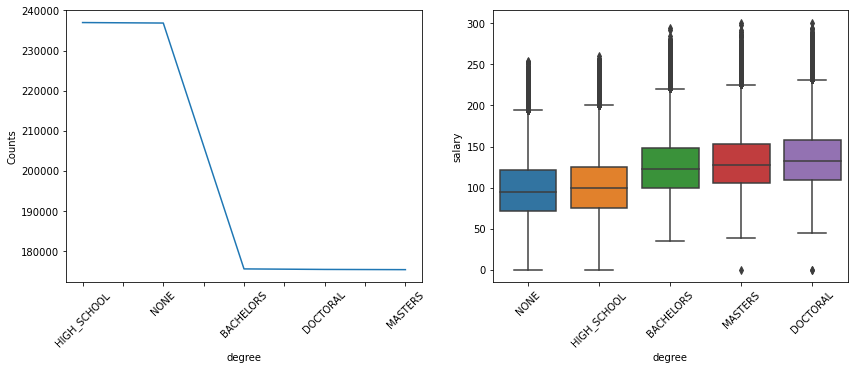

major
BIOLOGY        127.932664
BUSINESS       135.648980
CHEMISTRY      129.072085
COMPSCI        132.075605
ENGINEERING    138.436617
LITERATURE     124.423097
MATH           133.319735
NONE           102.583479
PHYSICS        130.372436
Name: salary, dtype: float64


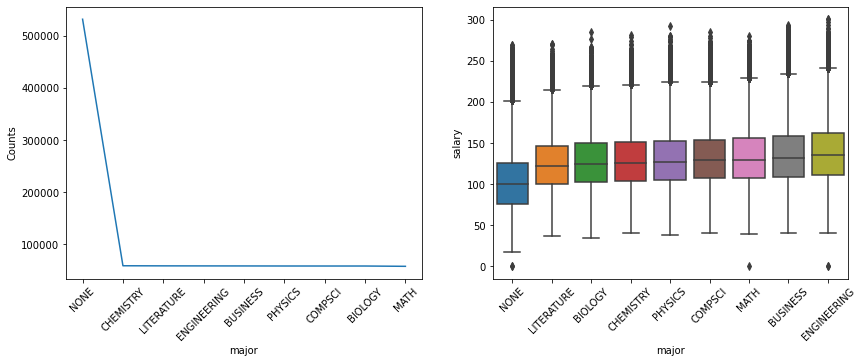

industry
AUTO         109.433690
EDUCATION     99.448386
FINANCE      130.746743
HEALTH       115.735540
OIL          130.952946
SERVICE      104.446820
WEB          121.644512
Name: salary, dtype: float64


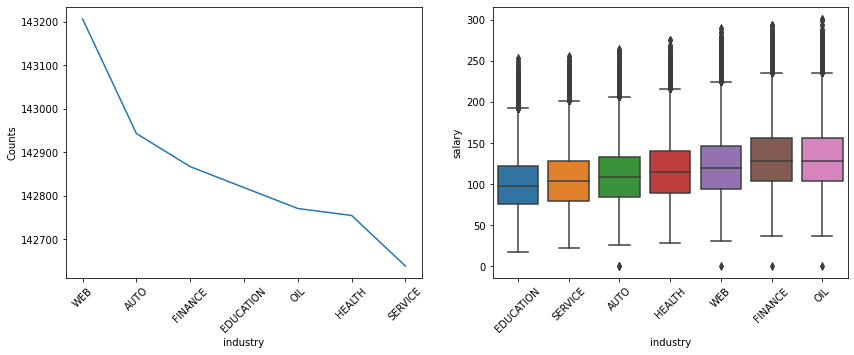

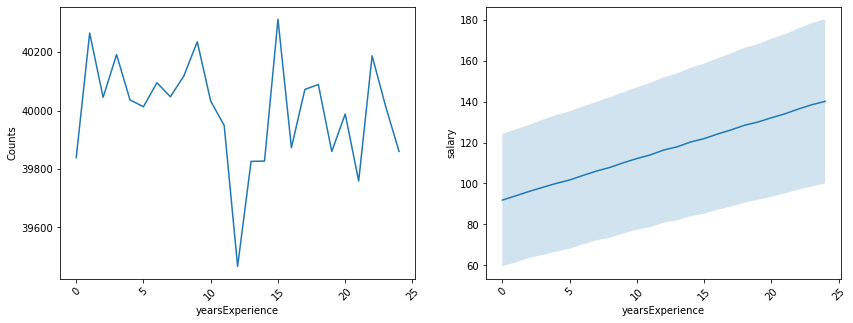

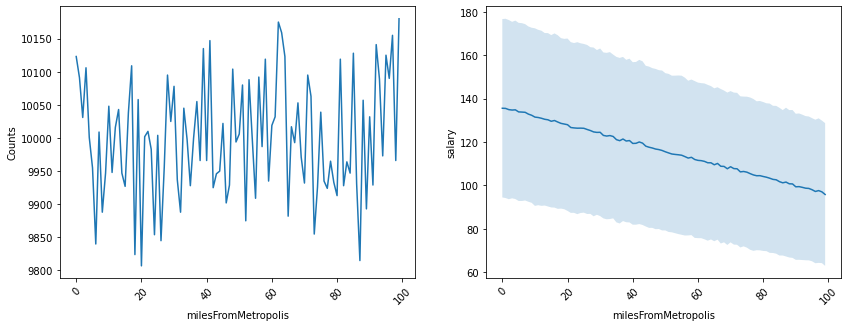

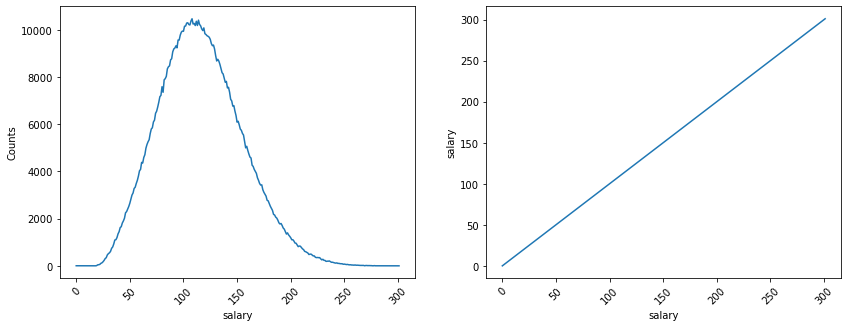

In [8]:
for (col_id, col_name) in enumerate(complete_train_df):
    if col_name!='jobId':
        plot_feature(complete_train_df, col_name, target)

Notable takeaways:
The breakdown of categorical features(jobType,degree, major, industry) reveal insights about their salary trends, arranged in ascending order as shown in the boxplots. The salary data intuively aligns (though not exactly) with the left line graphs, showing an inverse relationship with the number of observations within each section breakdown. This complements the supply and demand labor market theory.
The horizontal line for 'companyId' feature shows that there is no correlation with salary. 
'Years of Experience' feature increases with salary, showing direct relationship.
'Miles from Metropolis' feature decreases with salary, showing inverse relationship.



Visualize correlations between features and target variable using heatmap

In [40]:
def encode_label(df, col):
    #encode only the categories using average salary for each category to replace label
    cat_dict ={}
    if complete_train_df[col].dtype.name== 'object' and col!= 'jobId':
        df[col]=df[col].astype('category')
        cats = df[col].cat.categories.tolist()
        for cat in cats:
            cat_dict[cat] = complete_train_df[complete_train_df[col] == cat][target].mean()   
        df[col] = df[col].map(cat_dict)

cols = complete_train_df.columns.tolist()
cat_cols=cols[2:6]
for col in complete_train_df.columns:
    if complete_train_df[col].dtype.name == "object" and col!='jobId':
        encode_label(complete_train_df, col)
        cols = complete_train_df.columns.tolist()
    else:
        continue  
     
complete_train_df[cat_cols] = complete_train_df[cat_cols].apply(pd.to_numeric, errors='coerce')
# complete_train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                999995 non-null  object  
 1   companyId            999995 non-null  category
 2   jobType              999995 non-null  float64 
 3   degree               999995 non-null  float64 
 4   major                999995 non-null  float64 
 5   industry             999995 non-null  float64 
 6   yearsExperience      999995 non-null  int64   
 7   milesFromMetropolis  999995 non-null  int64   
 8   salary               999995 non-null  int64   
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 69.6+ MB


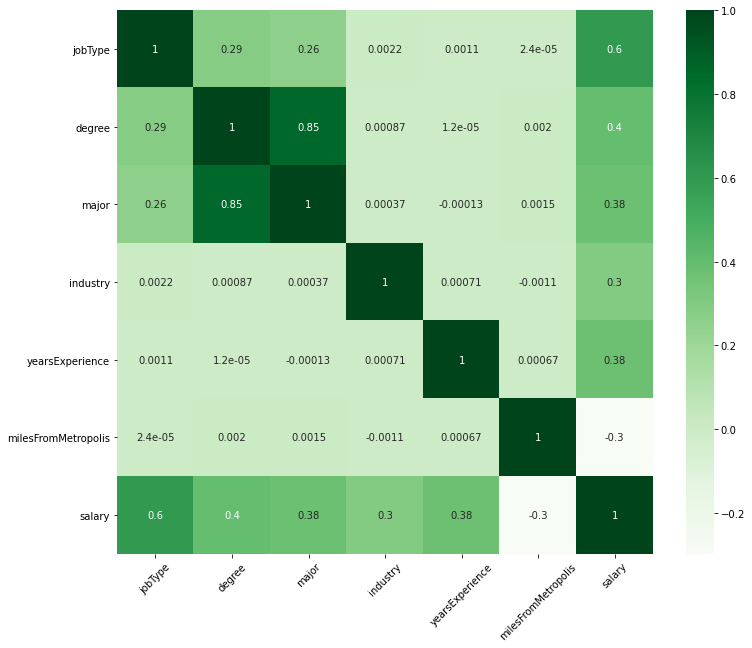

In [39]:
# Correlations between selected features and response
# jobId is discarded because it is unique identifier
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(complete_train_df[features + [target]].corr(), cmap='Greens', annot=True)
plt.xticks(rotation=45)
plt.show()

The strongest correlations are the values with the highest absolute values, with 'major' and 'degree' having the highest (with 0.85). 